In [1]:
import prophet as Prophet
from prophet.plot import add_changepoints_to_plot

C:\Users\JaredBailey\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/wb_df_updated.csv')

In [4]:
df.head()

,Season,Duke_Win,Duke_Loss,Duke_Overall_Win_Loss,Duke_Ranking,Opponent_Ranking,Attendance,Class_Or_Holiday,tempmax,tempmin,...,Opponent_Troy,Opponent_Virginia,Opponent_VirginiaTech,Opponent_WakeForest,Opponent_Winthrop,weather_cloudy,weather_partly_cloudy_day,weather_rain,weather_snow,Event_Type_TournamentGame
0,2016,2,0,1.000000,-1,-1,3263,0,62.24,25.34,...,False,False,False,False,False,False,False,True,False,False
1,2016,3,0,1.000000,-1,-1,3007,0,62.60,37.22,...,False,False,False,False,False,False,False,True,False,False
2,2016,4,0,1.000000,-1,-1,3040,0,67.46,37.94,...,False,False,False,False,False,False,False,False,False,False
3,2016,5,1,0.833333,-1,-1,3136,1,57.20,27.68,...,False,False,False,False,False,False,True,False,False,False
4,2016,9,1,0.900000,-1,3,6036,1,45.68,41.54,...,False,False,False,False,False,False,False,True,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season                     94 non-null     int64  
 1   Duke_Win                   94 non-null     int64  
 2   Duke_Loss                  94 non-null     int64  
 3   Duke_Overall_Win_Loss      94 non-null     float64
 4   Duke_Ranking               94 non-null     int64  
 5   Opponent_Ranking           94 non-null     int64  
 6   Attendance                 94 non-null     int64  
 7   Class_Or_Holiday           94 non-null     int64  
 8   tempmax                    94 non-null     float64
 9   tempmin                    94 non-null     float64
 10  tempavg                    94 non-null     float64
 11  feelslikemax               94 non-null     float64
 12  feelslikemin               94 non-null     float64
 13  feelslikeavg               94 non-null     float64
 

In [6]:
df["ds"] = pd.to_datetime(df["Game_Date"])
df["y"] = df["Attendance"]

In [31]:
df_02 = df[["ds"
            ,"y"
            ,"Duke_Overall_Win_Loss"
            ,"Duke_Ranking"
            ,"Opponent_Ranking"
            ,"Class_Or_Holiday"
            ,"Opponent_BostonCollege"
            ,"Opponent_Clemson"
            ,"Opponent_Elon"
            ,"Opponent_FloridaState"
            ,"Opponent_GeorgiaTech"
            ,"Opponent_HighPoint"
            ,"Opponent_Louisville"
            ,"Opponent_Miami"
            ,"Opponent_NCState"
            ,"Opponent_NorthCarolina"
            ,"Opponent_Northwestern"
            ,"Opponent_NotreDame"
            ,"Opponent_Penn"
            ,"Opponent_Pittsburgh"
            ,"Opponent_SouthCarolina"
            ,"Opponent_Syracuse"
            ,"Opponent_Troy"
            ,"Opponent_Virginia"
            ,"Opponent_VirginiaTech"
            ,"Opponent_WakeForest"
            ,"Opponent_Winthrop"
            ,"weather_cloudy"
            ,"weather_partly_cloudy_day"
            ,"weather_rain"
            ,"tempavg"
            ,"windspeed"
            ,"Game_Time"
            ]]

12:54:52 - cmdstanpy - INFO - Chain [1] start processing
12:54:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\JaredBailey\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\JaredBailey\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


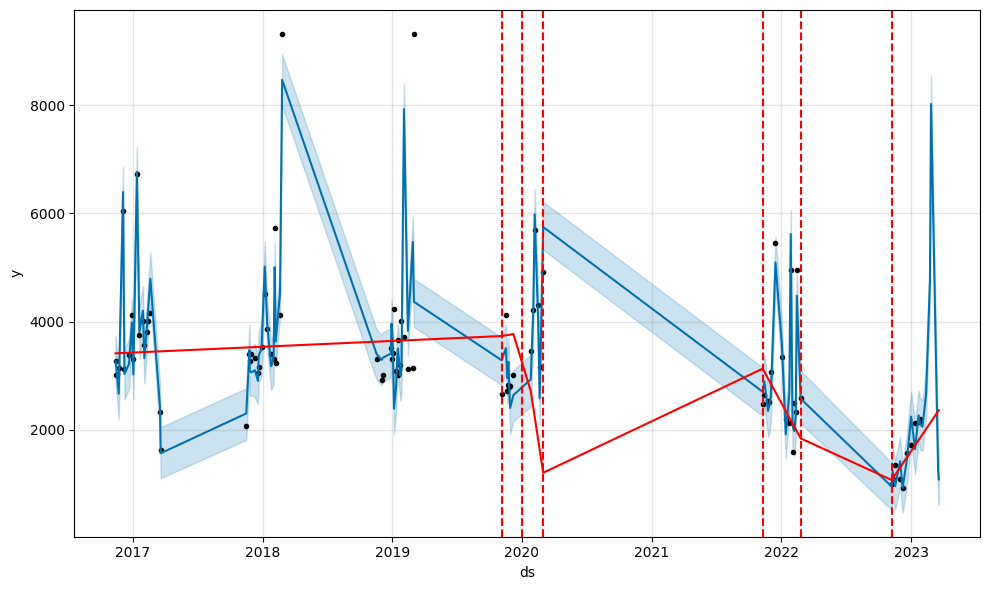

In [44]:
changepoints = [
                '2019-11-05', # First year of covid
                '2020-01-01',
                '2020-03-01',
                '2021-11-09', # First year after covid
                '2022-02-24',
                '2022-11-07' # Second year after covid
                ]

model = Prophet.Prophet(
    seasonality_mode="additive",
    growth="linear",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_prior_scale=.2,
    changepoint_prior_scale=20,
    changepoints=changepoints
)

model.add_regressor("Duke_Overall_Win_Loss")
model.add_regressor("Duke_Ranking")
model.add_regressor("Opponent_Ranking")
model.add_regressor("Class_Or_Holiday")
model.add_regressor("Opponent_BostonCollege")
model.add_regressor("Opponent_Clemson")
model.add_regressor("Opponent_Elon")
model.add_regressor("Opponent_FloridaState")
model.add_regressor("Opponent_GeorgiaTech")
model.add_regressor("Opponent_HighPoint")
model.add_regressor("Opponent_Louisville")
model.add_regressor("Opponent_Miami")
model.add_regressor("Opponent_NCState")
model.add_regressor("Opponent_NorthCarolina")
model.add_regressor("Opponent_Northwestern")
model.add_regressor("Opponent_NotreDame")
model.add_regressor("Opponent_Penn")
model.add_regressor("Opponent_Pittsburgh")
model.add_regressor("Opponent_SouthCarolina")
model.add_regressor("Opponent_Syracuse")
model.add_regressor("Opponent_Troy")
model.add_regressor("Opponent_Virginia")
model.add_regressor("Opponent_VirginiaTech")
model.add_regressor("Opponent_WakeForest")
model.add_regressor("Opponent_Winthrop")
model.add_regressor("weather_cloudy")
model.add_regressor("weather_partly_cloudy_day")
model.add_regressor("weather_rain")
model.add_regressor("tempavg")
model.add_regressor("windspeed")
model.add_regressor("Game_Time")


train = df_02[df_02["ds"] < "2023-02-01"]

model.fit(train)

future = model.make_future_dataframe(periods=365)

# # only keep future dates that are in certain dates
future = future[future["ds"].isin(pd.to_datetime([
"2016-11-13", "2016-11-15", "2016-11-17", "2016-11-22", "2016-12-04", "2016-12-08", "2016-12-21", "2016-12-29",
"2017-01-02", "2017-01-12", "2017-01-19", "2017-01-29", "2017-02-02", "2017-02-10", "2017-02-12", "2017-02-19", "2017-03-18", "2017-03-20",
"2017-11-16", "2017-11-25", "2017-11-26", "2017-11-30", "2017-12-10", "2017-12-19", "2017-12-21", "2017-12-29",
"2018-01-07", "2018-01-14", "2018-01-25", "2018-02-01", "2018-02-04", "2018-02-07", "2018-02-19", "2018-02-25",
"2018-11-18", "2018-12-02", "2018-12-06", "2018-12-28", "2018-12-30",
"2019-01-06", "2019-01-17", "2019-01-24", "2019-01-27", "2019-02-03", "2019-02-14", "2019-02-28", "2019-03-03", 
"2019-11-05", "2019-11-17", "2019-11-21", "2019-11-24", "2019-11-27", "2019-11-29", "2019-12-08",
"2019-01-02", "2019-01-12", "2019-01-16",
"2020-01-26", "2020-02-02", "2020-02-06", "2020-02-16", "2020-02-20", "2020-03-01",
"2021-11-09", "2021-11-14", "2021-11-24", "2021-11-28", "2021-12-02", "2021-12-15",
"2022-01-02", "2022-01-13", "2022-01-23", "2022-01-27", "2022-02-01", "2022-02-06", "2022-02-10", "2022-02-13", "2022-02-24",
"2022-11-07", "2022-11-10", "2022-11-17", "2022-12-01", "2022-12-08", "2022-12-21",
"2023-01-01", "2023-01-12", "2023-01-22", "2023-01-26", "2023-02-02", "2023-02-12", "2023-02-23", "2023-02-26", "2023-03-18", "2023-03-20"
]))]

future = future.reset_index(drop=True)

future["Duke_Overall_Win_Loss"] = df_02["Duke_Overall_Win_Loss"]
future["Duke_Ranking"] = df_02["Duke_Ranking"]
future["Opponent_Ranking"] = df_02["Opponent_Ranking"]
future["Class_Or_Holiday"] = df_02["Class_Or_Holiday"]
future["Opponent_BostonCollege"] = df_02["Opponent_BostonCollege"]
future["Opponent_Clemson"] = df_02["Opponent_Clemson"]
future["Opponent_Elon"] = df_02["Opponent_Elon"]
future["Opponent_FloridaState"] = df_02["Opponent_FloridaState"]
future["Opponent_GeorgiaTech"] = df_02["Opponent_GeorgiaTech"]
future["Opponent_HighPoint"] = df_02["Opponent_HighPoint"]
future["Opponent_Louisville"] = df_02["Opponent_Louisville"]
future["Opponent_Miami"] = df_02["Opponent_Miami"]
future["Opponent_NCState"] = df_02["Opponent_NCState"]
future["Opponent_NorthCarolina"] = df_02["Opponent_NorthCarolina"]
future["Opponent_Northwestern"] = df_02["Opponent_Northwestern"]
future["Opponent_NotreDame"] = df_02["Opponent_NotreDame"]
future["Opponent_Penn"] = df_02["Opponent_Penn"]
future["Opponent_Pittsburgh"] = df_02["Opponent_Pittsburgh"]
future["Opponent_SouthCarolina"] = df_02["Opponent_SouthCarolina"]
future["Opponent_Syracuse"] = df_02["Opponent_Syracuse"]
future["Opponent_Troy"] = df_02["Opponent_Troy"]
future["Opponent_Virginia"] = df_02["Opponent_Virginia"]
future["Opponent_VirginiaTech"] = df_02["Opponent_VirginiaTech"]
future["Opponent_WakeForest"] = df_02["Opponent_WakeForest"]
future["Opponent_Winthrop"] = df_02["Opponent_Winthrop"]
future["weather_cloudy"] = df_02["weather_cloudy"]
future["weather_partly_cloudy_day"] = df_02["weather_partly_cloudy_day"]
future["weather_rain"] = df_02["weather_rain"]
future["tempavg"] = df_02["tempavg"]
future["windspeed"] = df_02["windspeed"]
future["Game_Time"] = df_02["Game_Time"]


# future.tail(7)


forecast = model.predict(future)

fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [46]:
forecast.tail(6)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Class_Or_Holiday,Class_Or_Holiday_lower,Class_Or_Holiday_upper,Duke_Overall_Win_Loss,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
88,2023-02-02,1916.863879,1613.421803,2541.079711,1916.863879,1916.863879,0.0000,0.0000,0.0000,121.466325,...,89.570474,89.570474,89.570474,166.011147,166.011147,166.011147,0.0,0.0,0.0,2056.978741
89,2023-02-12,2013.798580,2198.593017,3122.137300,2013.798580,2013.798580,0.0000,0.0000,0.0000,142.287647,...,-124.799029,-124.799029,-124.799029,675.136838,675.136838,675.136838,0.0,0.0,0.0,2653.996198
90,2023-02-23,2120.426750,4348.855934,5250.096261,2120.426750,2120.426750,0.0000,0.0000,0.0000,113.203895,...,-192.027335,-192.027335,-192.027335,1243.390161,1243.390161,1243.390161,0.0,0.0,0.0,4771.780070
91,2023-02-26,2149.507160,7575.629235,8547.721253,2149.507160,2149.507160,0.0000,0.0000,0.0000,82.908321,...,-60.107640,-60.107640,-60.107640,1112.075462,1112.075462,1112.075462,0.0,0.0,0.0,8019.327632
92,2023-03-18,2343.376561,716.454008,1745.390852,2343.376561,2343.376561,205.9195,205.9195,205.9195,56.399694,...,-48.691513,-48.691513,-48.691513,-1263.438430,-1263.438430,-1263.438430,0.0,0.0,0.0,1231.221058
93,2023-03-20,2362.763501,616.058177,1607.409446,2362.763501,2362.763501,205.9195,205.9195,205.9195,25.071316,...,10.926041,10.926041,10.926041,-1314.192367,-1314.192367,-1314.192367,0.0,0.0,0.0,1084.714527
